<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;"/>

# Estadística con SciPy

_`SciPy` es paquete que incluye una colección de algoritmos matemáticos y funciones construidas sobre el paquete `NumPy`. En esta clase nos vamos a centrar en **cálculos estadísticos**._

Como siempre lo primero es lo primero, __importemos__ lo paquetes que vamos a utilizar:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## scipy.stats

Este módulo contiene un gran número de __distribuciones de probabilidad__, tanto continuas como discretas, así como un creciente número de __funciones estadísticas__.

In [25]:
# Importar el módulo entero
import scipy.stats as st

In [8]:
# Información
np.info(st)

.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   crystalball       -- Crystalball
   dgamma            -- Double Gamma
  

### Funciones

Carguemos unos datos, por ejemplo unas notas de la carrera, y veamos cómo podemos aprovechar las funciones de `scipy.stats`.

In [9]:
# esta línea no funciona en Windows
!head ..\data\notas.csv

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [10]:
# Leemos el archivo
datos = np.loadtxt("../data/notas.csv", skiprows=1)
datos

array([2.9, 4.3, 3.9, 0. , 4.1, 7.3, 2.3, 5.6, 2.9, 3.9, 4.6, 6.3, 2.1,
       2.1, 6.5, 1.9, 0. , 6.5, 2.5, 5.1, 5.3, 6.3, 5.4, 5.3, 5.3, 2. ,
       3.5, 4.4, 5.5, 3.6, 3.9, 2.5, 4.1, 3. , 4.6, 4. , 6.3, 0.6, 2.4,
       6.5, 2.3, 4.6, 6.9, 5.1, 5.4, 5.3, 4.5, 6.5, 2.1, 5.5, 3.4, 8.1,
       4. , 1.9, 1.6, 4.3, 4.6, 5.4, 1. , 6.5, 5.5, 4.9, 4. , 5.3, 3.5,
       4.4, 2.8, 5.4, 3.5, 2.3, 4.8, 2.1, 6.6, 0.5, 2.1, 3.1, 3.4, 5.9,
       3.4, 4.3, 1.5, 5.5, 4.4, 1.9, 4.4, 2.9, 3.9, 5.8, 2.8, 3. , 1.5,
       2.6, 2.9, 3.4, 5.4, 3.6, 4.6, 5. , 1.4, 4.3, 4.6, 3.1, 2. , 3.6,
       4. , 2.5, 3. , 5.1, 6.4, 3.5, 5.8, 4.1, 5.9, 4. , 6.4, 2.3, 7. ,
       1.4, 3.5, 4.4, 2.9, 5.1, 3.4, 4.8, 4.6, 4.3, 6.9, 5.4, 4. , 3.3,
       1.4, 1.9, 3.8, 3.4, 3.6, 3.8, 6.3, 4.8, 4. , 6.8, 4. , 3.6, 4.4,
       4.1, 6. , 4.1, 5.6, 3.9, 4.6, 5. , 6.5, 3.5, 5.5, 4.6, 4.8, 4.6,
       6.5, 4.1, 4.4, 5.3, 3.6, 7.1, 4.6, 2.1, 3.3, 3.9, 4. , 4.4, 0.9,
       4.3, 2.4, 2.9, 3.6, 1.4, 2.8, 2.5, 6.6, 0. , 5.1, 0. , 5.

In [11]:
# Descripción rápida de los datos
st.describe(datos)

DescribeResult(nobs=375, minmax=(0.0, 8.5), mean=3.970666666666667, variance=2.5927736185383243, skewness=-0.1320354699464629, kurtosis=-0.06611485627230884)

In [26]:
# Histograma con st
st.histogram(datos, numbins=10, defaultlimits=(0,10))

AttributeError: module 'scipy.stats' has no attribute 'histogram'

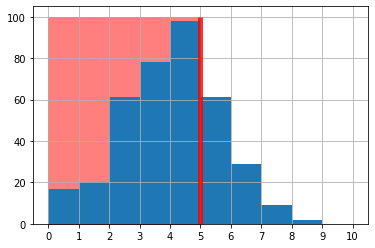

In [27]:
# Pintemos un histograma con plt
plt.hist(datos, range(0,11,))
plt.xticks(range(0,11))
plt.grid(True)

plt.vlines(5, 0, 100, lw=5, colors='red', alpha=0.8)
plt.fill_between([0, 5], [100, 100], color='red', alpha=0.5)

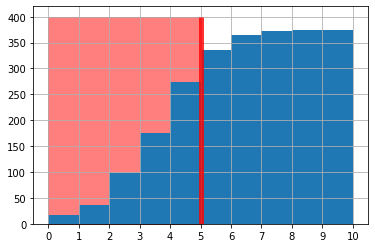

In [16]:
# Pintemos un histograma acumulado con plt
plt.hist(datos, range(0,11), cumulative=True)
plt.xticks(range(0,11))

plt.vlines(5, 0, 400, lw=5, colors='red', alpha=0.8)
plt.fill_between([0, 5], [400, 400], color='red', alpha=0.5)

plt.grid(True)

In [17]:
# Percentil
st.percentileofscore(datos, 5)

73.73333333333333

In [18]:
# Nota de un percentil
st.scoreatpercentile(datos, 50)

4.0

__¿Te parecen _normales_ estas notas?__ No, no me refiero a si te gustan o no... Me refiero a que si crees que estas notas se distribuyen de manera gaussiana.

### Distribuciones estadísticas

In [28]:
# Parámetros
med = st.nanmean(datos)
des_tip = st.nanstd(datos)

# Distribución normal
dist_normal = st.norm(loc=med, scale=des_tip)

AttributeError: module 'scipy.stats' has no attribute 'nanmean'

Ahora podemos ver:

* Función densidad de probabilidad (probability density function) `pdf`
* Función de distribución (cumulative distribution function) `cdf`

De esta manera, nos ahorramos definir funciones como:

$$N(\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

$$\phi(x)=\intop_{-\infty}^{x}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx$$

Para calcular probabilidades $P[a\leq X\leq b]=\intop_{a}^{b}f(x)dx$



In [20]:
# Calculamos la pdf
x = np.linspace(0, 10, 100)
y1 = dist_normal.pdf(x)
y1

NameError: name 'dist_normal' is not defined

In [21]:
# La representamos
plt.plot(x, y1)
plt.grid(True)

NameError: name 'y1' is not defined

In [22]:
# Calculamos la cdf
y2 = dist_normal.cdf(x)
y2

NameError: name 'dist_normal' is not defined

In [23]:
# La representamos
plt.plot(x, y2)
plt.grid(True)

NameError: name 'y2' is not defined

Del mismo modo se pueden usar otras distribuciones continuas o discretas e incluso, definir distribuciones propias. Pero sigamos con las notas...

### Tests

Ahora que ya hemos visualizado la distribución de las notas y que sabemos generar distribuciones normales. ¿Por qué no hacemos un [test de Kolmogórov-Smirnov](http://www.dmae.upm.es/WebpersonalBartolo/Probabilidad/14_ContrasteNoparametrico.pdf)?

Se trata de ver lo bien o lo mal que se ajusta la distribución a una normal con $\mu=3.97$ y $\sigma²=2.57$

In [24]:
bars = st.histogram(datos, numbins=10, defaultlimits=(0,10))[0]
bars /= 375

plt.bar(np.arange(0,10), bars, alpha=0.5, width=1)
plt.plot(x, y1, c='black', lw=2)

plt.grid(True)

AttributeError: module 'scipy.stats' has no attribute 'histogram'

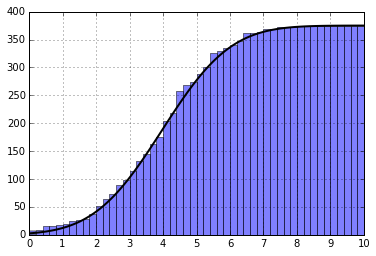

In [31]:
plt.hist(datos, np.linspace(0,10,51), cumulative=True, alpha=0.5)
plt.plot(x, y2 * 375, lw=2, c='black')

plt.xticks(range(0,11))
plt.grid(True)

In [32]:
datos2 = dist_normal.cdf
st.kstest(datos, dist_normal.cdf)

(0.04783071674813294, 0.34838712365988389)

_Se rechaza la hipótesis nula si el valor p asociado al resultado observado es igual o menor que el nivel de significación establecido, convencionalmente 0,05 ó 0,01. Es decir, el valor p nos muestra la probabilidad de haber obtenido el resultado que hemos obtenido si suponemos que la hipótesis nula es cierta._ ([Wikipedia](http://es.wikipedia.org/wiki/Valor_p))

Si probamos con `st.normaltest` que también comprueba la bondad del ajuste obtenemos un _valor-p_ más alto:

In [33]:
st.normaltest(datos)

(1.1315306710610515, 0.56792532695583819)

En definitiva, parece que las notas esta vez siguieron una normal con $\mu=3.97$ y $\sigma²=2.57$

---
<br/>
#### <h4 align="right">¡Síguenos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### Este notebook ha sido realizado por: Juan Luis Cano, y Álex Sáez 
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())